In [1]:
import pandas as pd
import os
from tensorflow.contrib.tensorboard.plugins import projector
from sklearn.manifold import TSNE
from collections import Counter
from six.moves import cPickle
import gensim.models.word2vec as w2v
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import multiprocessing
import os
import sys
import io
import re
import json
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [3]:
cleaned_training_data = pd.read_csv(r"C:\Users\jjtre\Documents\UCSD Coding Bootcamp Data Science\Final Project\data_analysis\training_cleaned_tweets_token_stopwords_expanded.csv", encoding='utf-8')
cleaned_training_data.head()

,tweet_polarity,date,tweet_text,clean_tweets,clean_tweets_words,clean_tweets_words_stopwords,word_count,clean_tweets_words_stopwords_join,word_count_stop_words
0,0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Davi...","['awww', 'that', 's', 'a', 'bummer', 'you', 's...","['awww', 'bummer', 'shoulda', 'got', 'david', ...",17,awww bummer shoulda got david carr third day,8
1,0,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,"['is', 'upset', 'that', 'he', 'can', 't', 'upd...","['upset', 'update', 'facebook', 'texting', 'mi...",21,upset update facebook texting might cry result...,11
2,0,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,"['i', 'dived', 'many', 'times', 'for', 'the', ...","['dived', 'many', 'times', 'ball', 'managed', ...",17,dived many times ball managed save 50 rest go ...,10
3,0,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"['my', 'whole', 'body', 'feels', 'itchy', 'and...","['whole', 'body', 'feels', 'itchy', 'like', 'f...",10,whole body feels itchy like fire,6
4,0,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...","['no', 'it', 's', 'not', 'behaving', 'at', 'al...","['behaving', 'mad', 'see']",20,behaving mad see,3


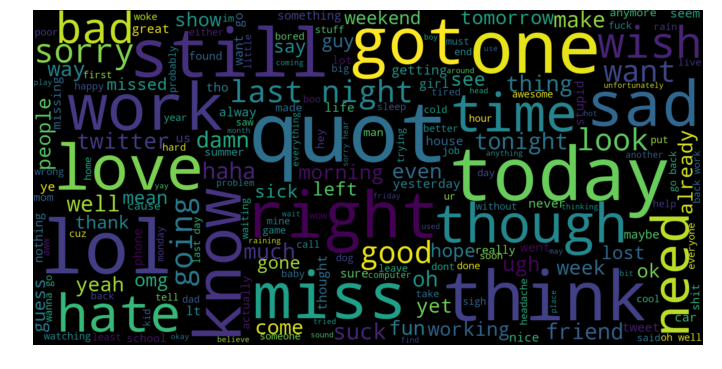

In [12]:
# make a word cloud from negative tweets
neg_tweets = cleaned_training_data[cleaned_training_data.tweet_polarity == 0]
neg_string = []
for t in neg_tweets.clean_tweets_words_stopwords_join:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
f = plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
f.savefig("images/negative_word_cloud.pdf", bbox_inches='tight')
f.savefig("images/negative_word_cloud.png", bbox_inches='tight', dpi=300)

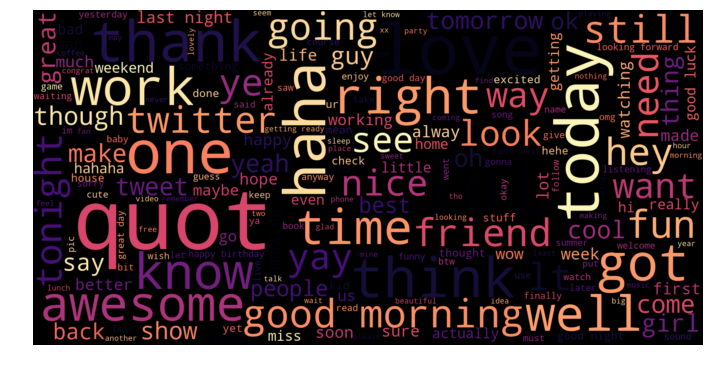

In [13]:
# make a word cloud from positive tweets
pos_tweets = cleaned_training_data[cleaned_training_data.tweet_polarity == 4]
pos_string = []
for t in pos_tweets.clean_tweets_words_stopwords_join:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
f = plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()
f.savefig("images/positive_word_cloud.pdf", bbox_inches='tight')
f.savefig("images/positive_word_cloud.png", bbox_inches='tight', dpi=300)